kaggle link
https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<h2 style="text-align:center">Key for data within dataframe</h2>

<p>Time of day</p>
<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Morning</td>
     <td>0</td>
   </tr>
   <tr>
     <td>Afternoon</td>
     <td>1</td>
   </tr>
   <tr>
     <td>Evening</td>
     <td>2</td>
   </tr>
   <tr>
     <td>Night</td>
     <td>3</td>
   </tr>
 </tbody>
</table>

<p>Accident severity</p>
<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Low</td>
     <td>0</td>
   </tr>
   <tr>
     <td>Medium</td>
     <td>1</td>
   </tr>
   <tr>
     <td>High</td>
     <td>2</td>
   </tr>
 </tbody>
</table>

<p>Road type</p>

<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Highway</td>
     <td>0</td>
   </tr>
   <tr>
     <td>City Road</td>
     <td>1</td>
   </tr>
   <tr>
     <td>Rural Road</td>
     <td>2</td>
   </tr>
   <tr>
     <td>Mountain Road</td>
     <td>3</td>
   </tr>
 </tbody>
</table>

<p>Weather</p>

<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Clear</td>
     <td>0</td>
   </tr>
   <tr>
     <td>Rainy</td>
     <td>1</td>
   </tr>
   <tr>
     <td>Foggy</td>
     <td>2</td>
   </tr>
   <tr>
     <td>Snowy</td>
     <td>3</td>
   </tr>
   <tr>
     <td>Stormy</td>
     <td>4</td>
   </tr>
 </tbody>
</table>

<p>Road condition</p>

<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Dry</td>
     <td>0</td>
   </tr>
   <tr>
     <td>Wet</td>
     <td>1</td>
   </tr>
   <tr>
     <td>Icy</td>
     <td>2</td>
   </tr>
   <tr>
     <td>Under Construction</td>
     <td>3</td>
   </tr>
 </tbody>
</table>

<p>Vechicle types</p>

<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Car</td>
     <td>0</td>
   </tr>
   <tr>
     <td>Truck</td>
     <td>1</td>
   </tr>
   <tr>
     <td>Motorcycle</td>
     <td>2</td>
   </tr>
   <tr>
     <td>Bus</td>
     <td>3</td>
   </tr>
 </tbody>
</table>

<p>Road right condition</p>

<table>
 <thead>
   <tr>
     <th>Label</th>
     <th>Value</th>
   </tr>
 </thead>
 <tbody>
   <tr>
     <td>Daylight</td>
     <td>0</td>
   </tr>
   <tr>
     <td>Artificial</td>
     <td>1</td>
   </tr>
   <tr>
     <td>No Light</td>
     <td>2</td>
   </tr>
 </tbody>
</table>

<h2> loading data in </h2>

In [34]:
data = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [35]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


<h2> Formatting/processing data</h2>

working out total null values within each column

In [36]:
for column in data.columns:
    print(f"{column} total null values: {sum(data[column].isnull())}")

Weather total null values: 42
Road_Type total null values: 42
Time_of_Day total null values: 42
Traffic_Density total null values: 42
Speed_Limit total null values: 42
Number_of_Vehicles total null values: 42
Driver_Alcohol total null values: 42
Accident_Severity total null values: 42
Road_Condition total null values: 42
Vehicle_Type total null values: 42
Driver_Age total null values: 42
Driver_Experience total null values: 42
Road_Light_Condition total null values: 42
Accident total null values: 42


removing null values

In [37]:
data = data.dropna()

In [38]:
#converting columns into a integer and not a float
data['Driver_Age'] = data['Driver_Age'].astype(int)
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].astype(int)
data['Driver_Experience'] = data['Driver_Experience'].astype(int)
data['Driver_Alcohol'] = data['Driver_Alcohol'].astype(int)
data['Traffic_Density'] = data['Traffic_Density'].astype(int)
data['Accident'] = data['Accident'].astype(int)

In [39]:
data['Weather'] = data['Weather'].map({"Clear":0, "Rainy":1,"Foggy":2,"Snowy":3,"Stormy":4})
data['Road_Type'] = data['Road_Type'].map({"Highway":0, "City Road":1,"Rural Road":2,"Mountain Road":3})
data['Time_of_Day'] = data['Time_of_Day'].map({"Morning":0, "Afternoon":1,"Evening":2,"Night":3})
data['Road_Condition'] = data['Road_Condition'].map({"Dry":0, "Wet":1,"Icy":2,"Under Construction":3})
data['Vehicle_Type'] = data['Vehicle_Type'].map({"Car":0, "Truck":1,"Motorcycle":2,"Bus":3})
data['Road_Light_Condition'] = data['Road_Light_Condition'].map({"Daylight":0, "Artificial Light":1,"No Light":2})

In [40]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,1,0,2,1,60.0,4,0,Low,2,0,54,52,1,0
3,0,1,1,2,60.0,3,0,Low,3,3,34,31,0,0
4,1,0,0,1,195.0,11,0,Low,0,0,62,55,1,1
6,2,0,1,0,60.0,4,0,Low,0,1,27,26,0,1
7,1,1,1,0,60.0,4,0,Low,0,0,29,22,1,1


<h2 style="text-align:center;"> data visualisation/understanding</h2>

<h3 >Sorting out age into categories </h3>

working out min and max in age

In [41]:
print("Minimum age: ",data['Driver_Age'].min())
print("Maximum age: ",data['Driver_Age'].max())

Minimum age:  18
Maximum age:  69


In [42]:
bins=[18,25,35,45,55,69]
ageGroupLabels = ['18-25','26-35','36-45','46-55','56-69']

ageGroups = pd.cut(data['Driver_Age'], bins, labels=ageGroupLabels)

print(ageGroups.value_counts())

Driver_Age
56-69    112
26-35     83
46-55     80
36-45     73
18-25     52
Name: count, dtype: int64


<h3>Plotting the data</h3>

<p style="text-align:center">functions used through out the visualisation stage</p>

In [43]:
def arrayValueSum(valuesArr,labelArr,dataframeColumn):
    for label in labelArr:
        valuesArr = np.append(valuesArr, sum((data[dataframeColumn] == label)==True))
    return valuesArr
        

<p style="text-align: center;">Weather and age visualisation</p>

Text(0.5, 1.0, 'Age distribution')

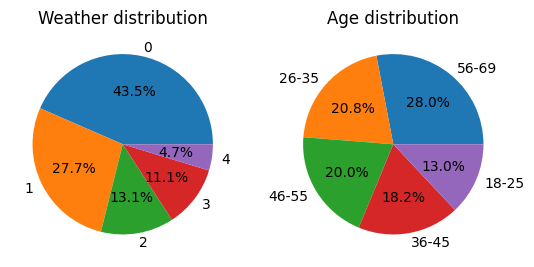

In [44]:
#working out the proportion of each type of condiction

fig,ax = plt.subplots(1,2)

wordLabels = [0,1,2,3,4]
totalWordArr = np.array([]).astype(int)

totalWordArr = arrayValueSum(totalWordArr,wordLabels,"Weather")

ax[0].pie(totalWordArr, labels=wordLabels, autopct="%1.1f%%")
ax[0].set_title("Weather distribution")


ageGroupsCounts = ageGroups.value_counts()
ax[1].pie(ageGroupsCounts, labels=ageGroupsCounts.index,autopct="%1.1f%%")
ax[1].set_title("Age distribution")

<p style="text-align:center">Traffic density and number of vechicles distribution</p>

In [45]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,1,0,2,1,60.0,4,0,Low,2,0,54,52,1,0
3,0,1,1,2,60.0,3,0,Low,3,3,34,31,0,0
4,1,0,0,1,195.0,11,0,Low,0,0,62,55,1,1
6,2,0,1,0,60.0,4,0,Low,0,1,27,26,0,1
7,1,1,1,0,60.0,4,0,Low,0,0,29,22,1,1


In [46]:
TrafficDensitylabels = ["Low","Moderate","High"]

trafficDensityCategory = [0,1,2]
NumberOfVechicalsCategory = np.array([]).astype(int)

traffic_density_value_total = np.array([]).astype(int)

<p>working out labels for number of vechicals</p>

In [47]:
print("Minimum amount of vechicals ",data['Number_of_Vehicles'].min())
print("Maximum amount of vechicals ",data['Number_of_Vehicles'].max())

Minimum amount of vechicals  1
Maximum amount of vechicals  14


NumberOfVechicalsCategory = np.arange(start=data['Number_of_Vehicles'].min(),stop=data['Number_of_Vehicles'].max()+1,step=1)
print(NumberOfVechicalsCategory)

<p>working out the total for both traffic density and number of vechicals</p>

In [48]:
traffic_density_value_total = arrayValueSum(traffic_density_value_total, trafficDensityCategory, "Traffic_Density")

#print(data['Number_of_Vehicles'].value_counts(ascending=True))
value_counts = data['Number_of_Vehicles'].value_counts(ascending=True)
NumberVechicalTotal = np.array([(label,value_counts.get(label,0)) for label in np.arange(start=data['Number_of_Vehicles'].min(),stop=data['Number_of_Vehicles'].max()+1,step=1)])

for _,value in NumberVechicalTotal:
    print(value)

80
75
81
78
78
0
0
0
0
3
5
1
1
3


<BarContainer object of 14 artists>

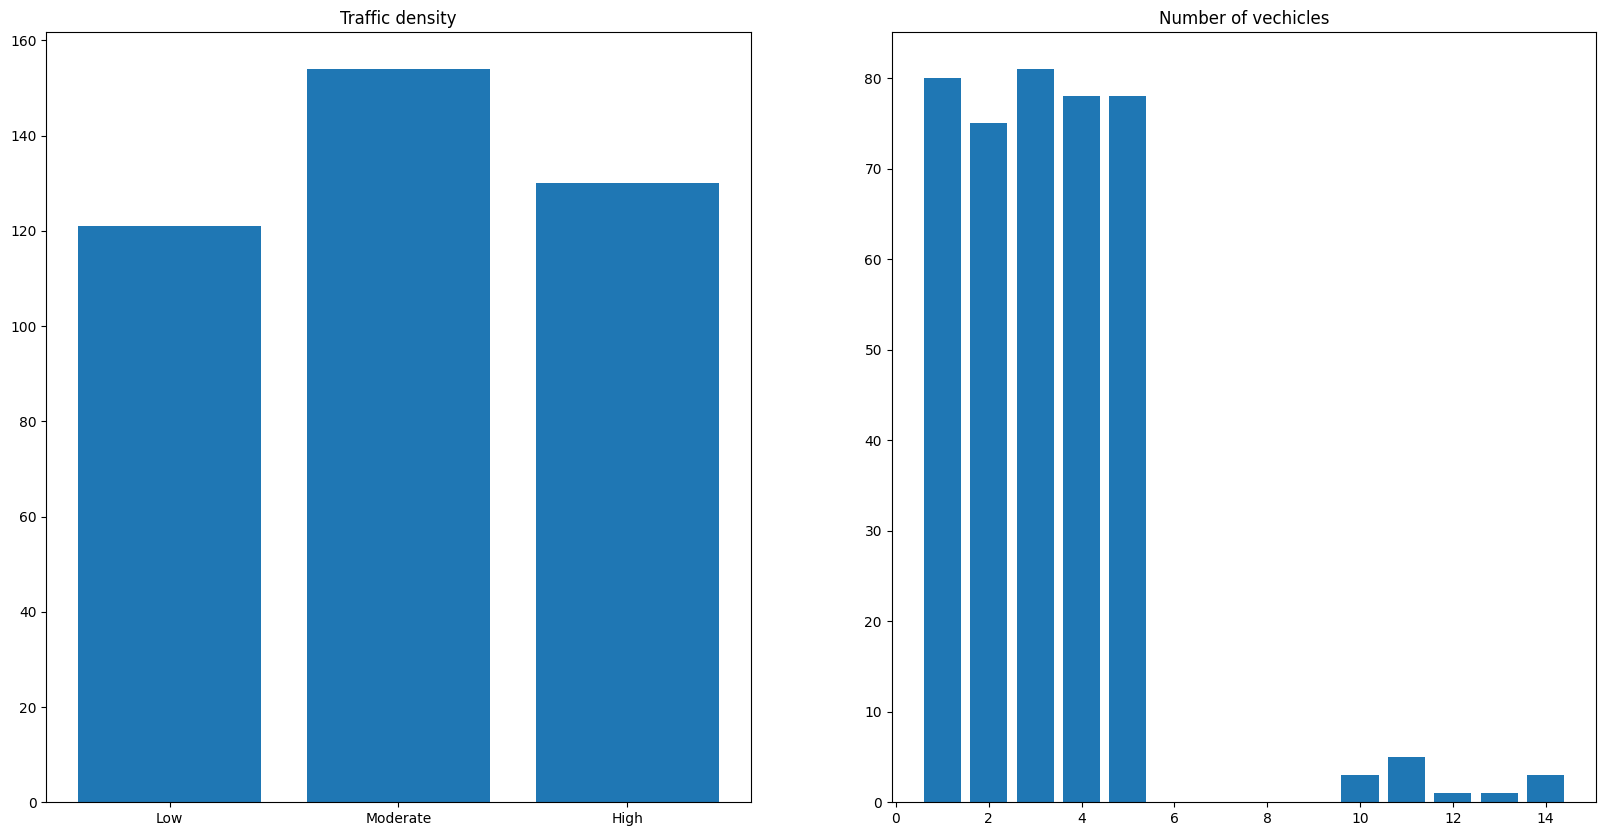

In [49]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

ax[0].bar(TrafficDensitylabels,traffic_density_value_total)
ax[0].set_title("Traffic density")


xLabel_vechicle = NumberVechicalTotal[:,0]
yLabel_vechicle = NumberVechicalTotal[:,1]


ax[1].set_title("Number of vechicles")
ax[1].bar(xLabel_vechicle,yLabel_vechicle)

<h2 style="text-align:center>Vechicle type visualisaiton</h2>

<p style="text-align:center">Visualisaing accident severity</p>

In [50]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,1,0,2,1,60.0,4,0,Low,2,0,54,52,1,0
3,0,1,1,2,60.0,3,0,Low,3,3,34,31,0,0
4,1,0,0,1,195.0,11,0,Low,0,0,62,55,1,1
6,2,0,1,0,60.0,4,0,Low,0,1,27,26,0,1
7,1,1,1,0,60.0,4,0,Low,0,0,29,22,1,1


In [51]:
def convertSeverity(value):
    match value:
        case "Low":
            return 0
        case "Moderate":
            return 1
        case "High":
            return 2
        case _:
            print(f"No case found with value {value}")

data['Accident_Severity'] = data['Accident_Severity'].apply(convertSeverity)
    

In [52]:
accidentLabel = ["Low", "Moderate", "High"]
accidentTotal = np.array([]).astype(int)

<BarContainer object of 3 artists>

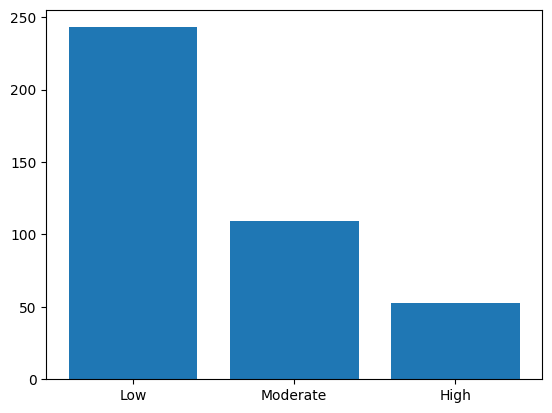

In [53]:
accidentTotal = arrayValueSum(accidentTotal,[value for value in range(3)],"Accident_Severity")
plt.bar(accidentLabel,accidentTotal)


In [54]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,1,0,2,1,60.0,4,0,0,2,0,54,52,1,0
3,0,1,1,2,60.0,3,0,0,3,3,34,31,0,0
4,1,0,0,1,195.0,11,0,0,0,0,62,55,1,1
6,2,0,1,0,60.0,4,0,0,0,1,27,26,0,1
7,1,1,1,0,60.0,4,0,0,0,0,29,22,1,1


<h2 style="text-align:center">Training the Machine learning model</h2>

In [55]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,1,0,2,1,60.0,4,0,0,2,0,54,52,1,0
3,0,1,1,2,60.0,3,0,0,3,3,34,31,0,0
4,1,0,0,1,195.0,11,0,0,0,0,62,55,1,1
6,2,0,1,0,60.0,4,0,0,0,1,27,26,0,1
7,1,1,1,0,60.0,4,0,0,0,0,29,22,1,1


In [56]:
x = data.drop("Accident",axis=1)
y = data['Accident']

In [57]:
y.head()

2    0
3    0
4    1
6    1
7    1
Name: Accident, dtype: int64

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [59]:
clf = RandomForestClassifier(n_estimators=240)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=240)

In [60]:
y_pred = clf.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.7407407407407407

<h2 style="text-align:center">Working out why the score is so low</h2>

In [62]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,1,0,2,1,60.0,4,0,0,2,0,54,52,1,0
3,0,1,1,2,60.0,3,0,0,3,3,34,31,0,0
4,1,0,0,1,195.0,11,0,0,0,0,62,55,1,1
6,2,0,1,0,60.0,4,0,0,0,1,27,26,0,1
7,1,1,1,0,60.0,4,0,0,0,0,29,22,1,1


In [73]:
newData = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [74]:
newData.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [75]:
newData.dropna(inplace=True)

In [76]:
for column in newData.columns:
    print(f"{column} total null values: {sum(newData[column].isnull())}")

Weather total null values: 0
Road_Type total null values: 0
Time_of_Day total null values: 0
Traffic_Density total null values: 0
Speed_Limit total null values: 0
Number_of_Vehicles total null values: 0
Driver_Alcohol total null values: 0
Accident_Severity total null values: 0
Road_Condition total null values: 0
Vehicle_Type total null values: 0
Driver_Age total null values: 0
Driver_Experience total null values: 0
Road_Light_Condition total null values: 0
Accident total null values: 0


In [83]:

weather = pd.get_dummies(newData['Weather'])
timeOfDay = pd.get_dummies(newData['Time_of_Day'])

In [82]:
weather.head()

,Clear,Foggy,Rainy,Snowy,Stormy
2,False,False,True,False,False
3,True,False,False,False,False
4,False,False,True,False,False
6,False,True,False,False,False
7,False,False,True,False,False


In [84]:
timeOfDay.head()

,Afternoon,Evening,Morning,Night
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False
6,True,False,False,False
7,True,False,False,False
